# Projected Gradient Method


In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import seaborn as sns
import math
import time

In [61]:
def projk(u,g):
    import numpy as np
    k=np.maximum(u,g)
    return(k)

In [63]:
def projected_gradient_fixed_step (J, DJ , gn , u0 , rho , Tol , iterMax , store ):
    k=0
    r=Tol
    u=[u0]
    while((r>=Tol)&(k<iterMax)):
        w=-DJ(u0)
        uo=u0
        u0=projk(u0+rho*w,gn(u0))
        u.append(u0)
        r=np.sqrt(np.dot(u0-uo),np.dot(u0-uo))
        k+=1
    if (store==0):
        return(u0,k)
    elif (store==1):
        return(u,k)
        

The minimum is 0.10459942768426629   0.10465422649031544


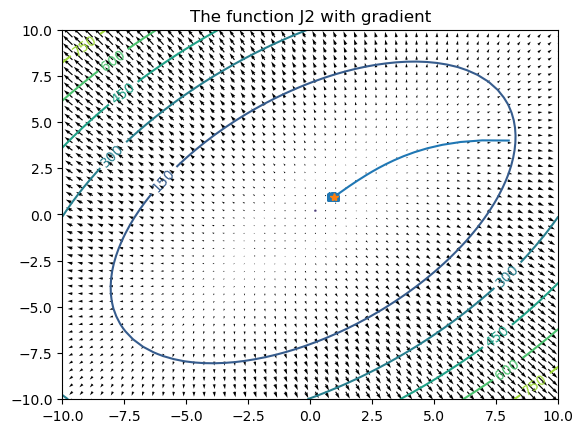

In [84]:
def fixed_step(J, DJ , gn , u0 , rho , Tol , iterMax , store):
     k=0
     l1=[u0[0]]
     l2=[u0[1]]
     r=Tol
     u0=u0
     while(r>=Tol) and (k<=iterMax):
       w=-DJ(u0)
       uo=u0
       u0=projk(u0+rho*w,gn(u0))
       l1.append(u0[0])
       l2.append(u0[1])
       r=math.sqrt(np.dot(u0-uo,u0-uo))
       k+=1
     if (store==0):
        return(l1[-1],l2[-1],k)
     elif (store==1):
        return(l1,l2,k)

x=np.linspace(-10,10,50)
y=np.linspace(-10,10,50)

X,Y=np.meshgrid(x,y)

J=3*(X**2-X*Y+Y**2)-(1/3)*(X+Y)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, J)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('The function J2 with gradient')


V=-3*X+6*Y-(1/3)*np.ones(50)
U=6*X-3*Y-(1/3)*np.ones(50)
plt.quiver(X,Y,U,V)

def f(x):
    return(np.ones(np.size(x)))

def gn(x):
    n=np.size(x)
    return(np.maximum(1.5*np.ones(n)-20*(x-0.6*np.ones(n))**2,np.zeros(n)))



fv = [1,1] 
Jf = lambda u : J (u , fv )
DJf = lambda u : DJ (u , fv )

l1,l2,k=fixed_step(Jf, DJf , gn , [8,4] , 0.01 , 1e-5 , 2000 , 1)
xf=l1[-1]/9
yf=l2[-1]/9
print("The minimum is",xf," ",yf)

plt.plot(l1,l2)
plt.plot(l1[-1],l2[-1],'*')
plt.show()

In [65]:
def projected_gradient_fixed_step ( gn , u0 , rho , Tol , iterMax ):
    n = len(u0)
    u =u0
    k=0 
    L=[]
    L.append(u0)
    b=np.ones(n)
    w=-DJ(u,b)
    r=Tol
    start=time.time()
    while(k <= iterMax and r >= Tol):
      k+=1
      s=u
      u = projk((u+rho*w),gn)
      w=-DJ(u,b)
      L.append(u)
    end = time.time()
    return np.array(L),k-1,end-start


In [66]:
def g(x):
    L=[]
    for i in range(len(x)):
        L.append(max(1.5-20*(x[i]-0.6)**2,0))
    return np.array(L)

### rho=0.1

In [69]:
valeurs=[5,20,50,100]
for i in valeurs:
  u0 =np.zeros(i)
  rho = 0.1 
  Tol=10e-5
  iterMax=100
  x = np . linspace (0 , 1 , i )
  gn=g(x)
  L,k,t=projected_gradient_fixed_step ( gn , u0 , rho , Tol , iterMax  )
  print("For n=",i)
  print("The number of iterations is:")
  print(k)
  print("The execution time is:")
  print(t)
  print("\n")

For n= 5
The number of iterations is:
100
The execution time is:
0.011811971664428711


For n= 20
The number of iterations is:
100
The execution time is:
0.007861852645874023


For n= 50
The number of iterations is:
100
The execution time is:
0.011079549789428711


For n= 100
The number of iterations is:
100
The execution time is:
0.0065648555755615234




### rho=0.5

In [70]:
valeurs=[5,20,50,100]
for i in valeurs:
  u0 =np.zeros(i)
  rho = 0.5 
  Tol=10e-5
  iterMax=100
  x = np . linspace (0 , 1 , i )
  gn=g(x)
  L,k,t=projected_gradient_fixed_step ( gn , u0 , rho , Tol , iterMax  )
  print("For n=",i)
  print("The number of iterations is:")
  print(k)
  print("The execution time is:")
  print(t)
  print("\n")

For n= 5
The number of iterations is:
100
The execution time is:
0.013611793518066406


For n= 20
The number of iterations is:
100
The execution time is:
0.010663032531738281


For n= 50
The number of iterations is:
100
The execution time is:
0.008027076721191406


For n= 100
The number of iterations is:
100
The execution time is:
0.016131162643432617




### rho=1

In [71]:
valeurs=[5,20,50,100]
for i in valeurs:
  u0 =np.zeros(i)
  rho = 1 
  Tol=10e-5
  iterMax=100
  x = np . linspace (0 , 1 , i )
  gn=g(x)
  L,k,t=projected_gradient_fixed_step ( gn , u0 , rho , Tol , iterMax  )
  print("For n=",i)
  print("The number of iterations is:")
  print(k)
  print("The execution time is:")
  print(t)
  print("\n")

For n= 5
The number of iterations is:
100
The execution time is:
0.006879091262817383


For n= 20
The number of iterations is:
100
The execution time is:
0.010826826095581055


For n= 50
The number of iterations is:
100
The execution time is:
0.006602764129638672


For n= 100
The number of iterations is:
100
The execution time is:
0.01033639907836914




#### It is noted that the number of iterations varies depending on $\rho$, so one must choose an optimal step. We have chosen.
$$
\rho=\frac{2}{\lambda_{1}+\lambda_{n}}
$$


In [74]:
a=A(100)
w=np.linalg.eigvals(a)
mn=np.min(w)
mx=np.max(w)
rho=2/(mx+mn)
u0 =np.zeros(100)
Tol=10e-5
iterMax=100
x = np . linspace (0 , 1 , 100 )
gn=g(x)
L,k,t=projected_gradient_fixed_step ( gn , u0 , rho , Tol , iterMax  )
print("n=",100)
print("The number of iterations is:")
print(k)
print("The execution time for optimal rho:")
print(t)
print("\n")

print("The number of iterations is:")
print(k)
print("The execution time is:")
print(t)
print("\n")

n= 100
The number of iterations is:
100
The execution time for optimal rho:
0.015537261962890625


The number of iterations is:
100
The execution time is:
0.015537261962890625




### Pour $f(x)=$ $\pi^{2} \sin (\pi x)$.



In [75]:
def f(x):
    return((np.pi**2)*np.sin(x*np.pi))

In [77]:
a=A(100)
w=np.linalg.eigvals(a)
mn=np.min(w)
mx=np.max(w)
rho=2/(mx+mn)
u0 =np.zeros(100)
Tol=10e-5
iterMax=100
x = np . linspace (0 , 1 , 100 )
gn=g(x)
L,k,t=projected_gradient_fixed_step ( gn , u0 , rho , Tol , iterMax  )
print("n=",100)
print("The number of iterations is:")
print(k)
print("The execution time is:")
print(t)
print("\n")

n= 100
The number of iterations is:
100
The execution time is:
0.006637096405029297


